# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Muhammad Gemilang Ramahan]
- **Email:** [gemilangramadhan000@gmail.com]
- **Email Bangkit:** [m004b4ky2856@bangkit.academy]
- **ID Dicoding:** [gemilang_ramadhan]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap penyewaan sepeda dalam musim yang berbeda?

- Apakah ada peristiwa (seperti hari libur atau kondisi cuaca ekstrem) yang secara signifikan memengaruhi jumlah penyewaan sepeda, dan bagaimana peristiwa ini berkorelasi dengan peningkatan atau penurunan penggunaan?

- Pada musim apakah para penyewa sepeda memiliki antusias yang paling tinggi? Dan pada jam berapa yang termasuk peak hours pada kondisi antusiasme tersebut


## Import Semua Packages/Library yang Digunakan

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [42]:
# Load datasets
day_df = pd.read_csv('./data/bike/day.csv')
hour_df = pd.read_csv('./data/bike/hour.csv')

In [43]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [44]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ditemukan data na/null
- tipe data sudah sesuai dengan apa yang diinginkan

# Dataset characteristics
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv	
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Assessing Data

In [45]:
# day_df.isna().sum()
# hour_df.isna().sum()
# day_df.info()
# type(day_df['dteday'])
# hour_df.info()

# day_df.duplicated().sum()
# hour_df.duplicated().sum()

#Uncomment yang diinginkan

**Insight:**
- Tidak ada duplikasi
- Tidak ada data yang perlu di fill

## Exploratory Data Analysis (EDA)

### Explore ...

In [46]:
weather_labels = {
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds',
    3: 'Light Snow, Light Rain + Thunderstorm',
    4: 'Heavy Rain, Snow + Fog'
}

# Pembuatan variable yang diperlukan
day_df['weather_desc'] = day_df['weathersit'].map(weather_labels)
hour_df['weather_desc'] = hour_df['weathersit'].map(weather_labels)


season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

day_df['season_desc'] = day_df['season'].map(season_labels)

# Grouping Data as needed
grouped_data = day_df.groupby(['season_desc', 'weather_desc'])['cnt'].mean().reset_index()
grouped_hour_data = hour_df.groupby(['holiday', 'weather_desc'])['cnt'].mean().reset_index()
hourly_peak_data = hour_df.groupby('hr')['cnt'].mean().reset_index()


**Insight:**
- Melakukan variable assessing untuk digunakan pada plotting.
- Grouping data dilakukan untuk melihat tren yang dihasilkan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

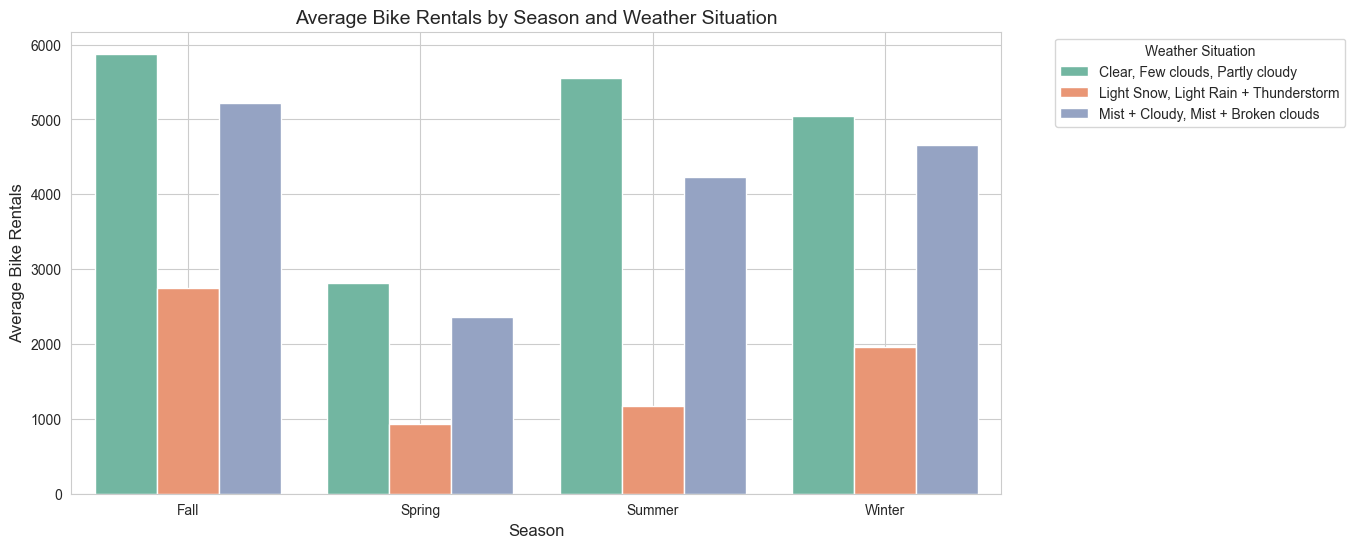

In [47]:
sns.set_style('whitegrid')
sns.set_palette('Set2')

plt.figure(figsize=(12, 6))

sns.barplot(data=grouped_data, x='season_desc', y='cnt', hue='weather_desc')

plt.title('Average Bike Rentals by Season and Weather Situation', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.legend(title='Weather Situation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Pertanyaan 2:

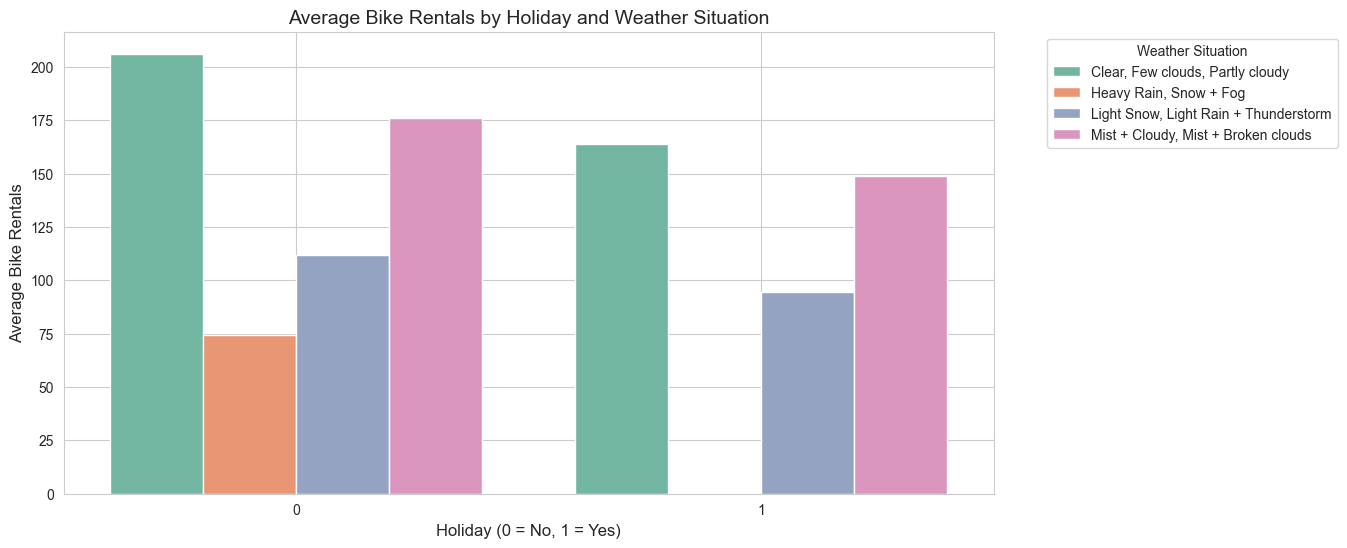

In [48]:
plt.figure(figsize=(12, 6))

sns.barplot(data=grouped_hour_data, x='holiday', y='cnt', hue='weather_desc')

plt.title('Average Bike Rentals by Holiday and Weather Situation', fontsize=14)
plt.xlabel('Holiday (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.legend(title='Weather Situation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Pertanyaan 3

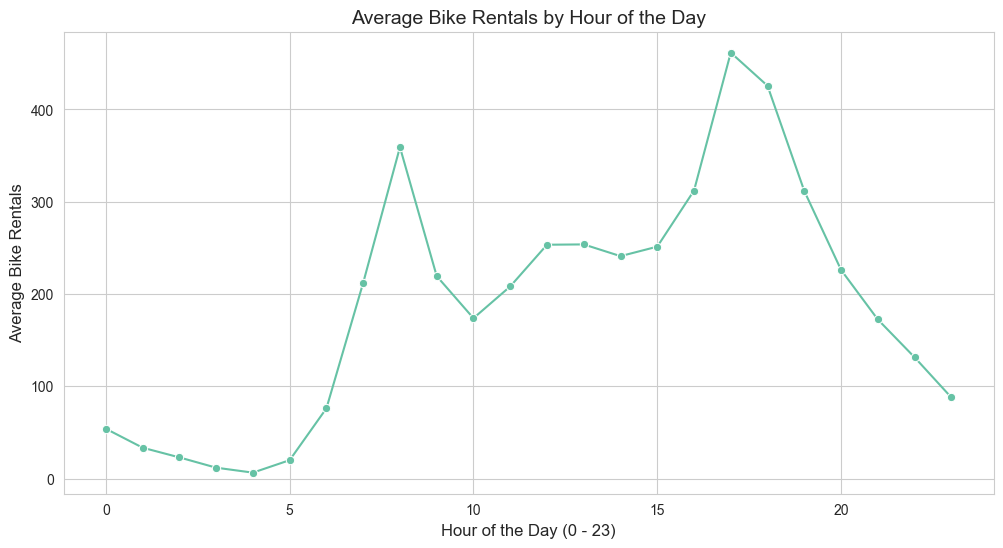

In [49]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=hourly_peak_data, x='hr', y='cnt', marker='o')

plt.title('Average Bike Rentals by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day (0 - 23)', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.grid(True)
plt.show()

# Analisis Lanjutan

**Untuk memberikan informasi yang lebih lanjut, saya ingin membandingkan casual user dan registered user untuk mengetahui perbandingan total penyewaan sepeda dari semua total data**

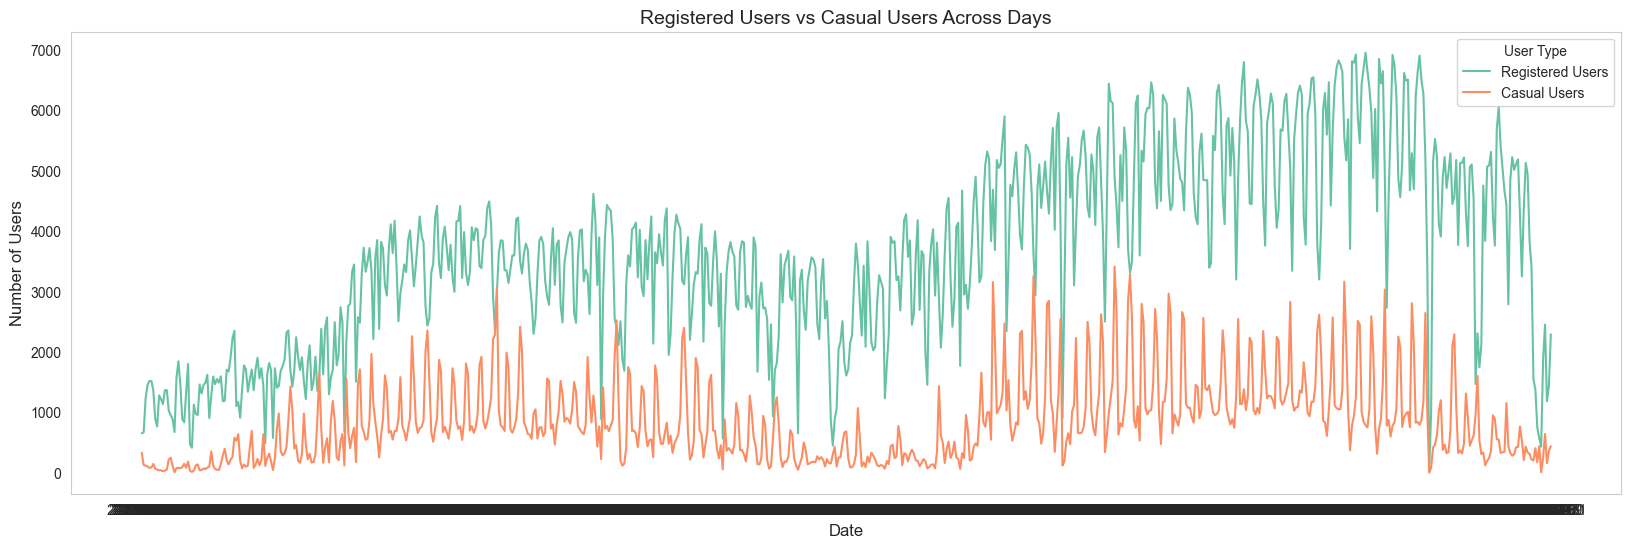

In [52]:
plt.figure(figsize=(20, 6))

sns.lineplot(data=day_df, x='dteday', y='registered', label='Registered Users')

sns.lineplot(data=day_df, x='dteday', y='casual', label='Casual Users')


plt.title('Registered Users vs Casual Users Across Days', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.grid(False)
plt.legend(title='User Type')
plt.show()

# Insight/Conclusion:
## Insight Question 1
- Cuaca ekstrem seperti hujan lebat atau salju ringan (Light Snow, Light Rain + Thunderstorm) memiliki dampak negatif terhadap penyewaan sepeda di setiap musim.

- Musim gugur memiliki tingkat penyewaan yang paling tinggi, terkhususnya pada saat kondisi cuaca yang cerah (Clear, Few clouds, Partly cloudy)

## Insight Question 2
- Penyewaan sepeda cenderung lebih banyak pada saat hari biasa. Hipotesa pribadi saya adalah, karena pada saat hari libur, orang-orang cenderung membawa kendaraan mobil pribadi untuk liburan bersama keluarga.

## Insight Question 3
- Peak hours terjadi sekitar pukul 07:00-08:00 dan 16:00-18:00, kemungkinan karena itu adalah jam-jam masuk kerja dan pulang kerja.

## Insight Analisis Lanjutan
- Pengguna yang teregistrasi menggunakan jasa penyewaan sepeda lebih banyak daripada orang yang hanya menyewa secara casual.
